In [1]:
!pip install pandas-datareader

You should consider upgrading via the 'C:\Users\visha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [5]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985
2022-09-01,277.579987,266.149994,272.579987,277.160004,54287000.0,277.160004
2022-09-02,282.350006,269.079987,281.070007,270.209991,50752200.0,270.209991
2022-09-06,275.989990,265.739990,272.679993,274.420013,55860000.0,274.420013
2022-09-07,283.839996,272.269989,273.100006,283.700012,49889300.0,283.700012


<AxesSubplot:xlabel='Date'>

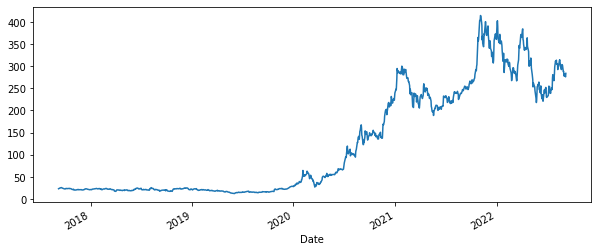

In [10]:
df_tesla['High'].plot(figsize=(10,4))

<AxesSubplot:xlabel='Date'>

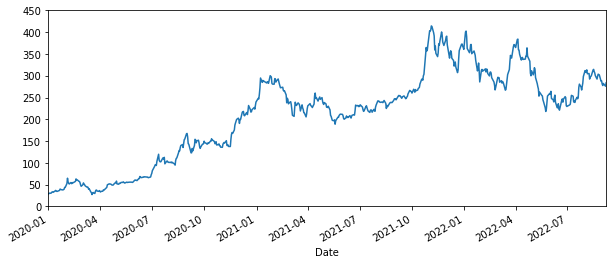

In [16]:
## xlimit and ylimit
df_tesla['High'].plot(xlim=['2020-01-01', '2022-09-07'],ylim=(0,450), figsize=(10,4))

<AxesSubplot:xlabel='Date'>

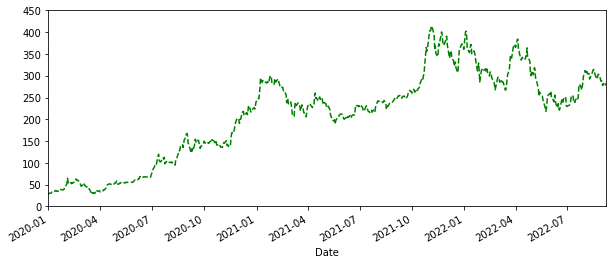

In [19]:
## xlimit and ylimit
df_tesla['High'].plot(xlim=['2020-01-01', '2022-09-07'],ylim=(0,450), figsize=(10,4), ls='--',c='green')

In [22]:
index = df_tesla.loc['2020-01-01':'2022-09-07'].index
share_open = df_tesla.loc['2020-01-01':'2022-09-07']['Open']

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

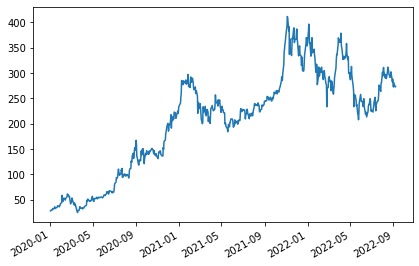

In [28]:
figure,axis=plt.subplots()
plt.tight_layout()
# preventing xlabels overlapping
figure.autofmt_xdate()
axis.plot(index, share_open)

In [29]:
## Datetime index

In [46]:
df_tesla = df_tesla.set_index('Date', drop=True)

## Time Resampling

In [49]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [50]:
## Business end frequency
df_tesla.resample('BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [52]:
## Business quarter
df_tesla.resample('BQ').max().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-29,25.974001,25.178667,25.350000,25.666668,122391000.0,25.666668
2017-12-29,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-03-30,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-06-29,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-09-28,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667


<AxesSubplot:xlabel='Date'>

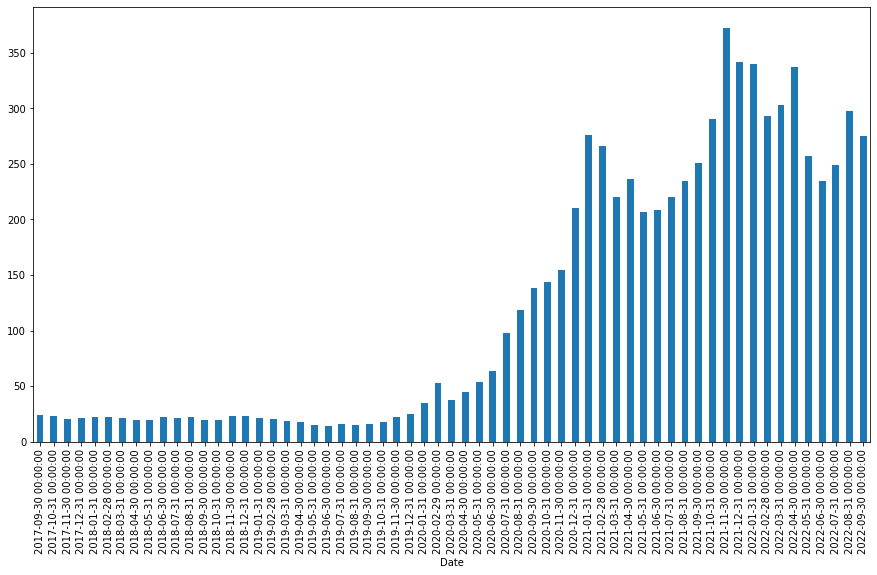

In [58]:
## Plotting

df_tesla['Open'].resample('M').mean().plot(figsize=(15,8),kind='bar')

## Rolling and Expanding

In [64]:
df_tesla['High'].rolling(5).mean().head(20)

Date
2017-09-08          NaN
2017-09-11          NaN
2017-09-12          NaN
2017-09-13          NaN
2017-09-14    24.377066
2017-09-15    24.780000
2017-09-18    25.125333
2017-09-19    25.307066
2017-09-20    25.442800
2017-09-21    25.427733
2017-09-22    25.293067
2017-09-25    24.864533
2017-09-26    24.449200
2017-09-27    24.092400
2017-09-28    23.638000
2017-09-29    23.301733
2017-10-02    23.118134
2017-10-03    23.082267
2017-10-04    23.177334
2017-10-05    23.373200
Name: High, dtype: float64

In [65]:
df_tesla['open_30_day_rolling']=df_tesla['Open'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

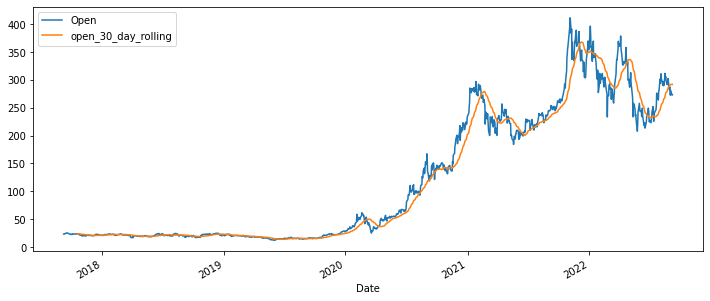

In [68]:
df_tesla[['Open', 'open_30_day_rolling']].plot(figsize=(12,5))